In [62]:
import pandas as pd
import numpy as np
import matplotlib as plt
import scipy as sp
from scipy import stats as sps
from matplotlib import pyplot, pylab #accidentally messed up functions somehow, didnt want to clear on restart
#probably fix itself later, but stuck with pyplot to keep it all the same now
%matplotlib inline

Note: you may need to restart the kernel to use updated packages.


In [3]:
cities = pd.read_csv('./cities.csv',encoding="ISO-8859-1")
customers = pd.read_csv('./customers.csv',encoding="ISO-8859-1")
item_master = pd.read_csv('./item_master.csv')
sales = pd.read_csv('./sales.csv')
sales_rep = pd.read_csv('./sales_rep.csv')

In [3]:
null1 =cities.isna().sum()
null2 =customers.isna().sum()
null3 =item_master.isna().sum()
null4 =sales.isna().sum()
null5 =sales_rep.isna().sum()
print(f'CITIES:\n{null1}\nBREAK\ncustomers\n:{null2}\nBREAK\nitems:\n{null3}\nBREAK\n,sales:\n{null4}\nBREAK\n,reps:\n{null5}')
#one null description in cities, 5/25 null values in sales reps on secondary/tertiary reps 


CITIES:
City         0
City Code    0
Region       0
Latitude     0
Longitude    0
Desc         1
dtype: int64
BREAK
customers
:Customer           0
Customer Number    0
City Code          0
dtype: int64
BREAK
items:
Item Number          0
Product Group        0
Product Line         0
Product Sub Group    0
Product Type         0
dtype: int64
BREAK
,sales:
%KEY                      0
Cost                      0
Customer Number           0
Date                      0
GrossSales                0
Invoice Date              0
Invoice Number            0
Item Desc                 0
Item Number               0
Margin                    0
Order Number              0
Promised Delivery Date    0
Sales                     0
Sales Qty                 0
Sales Rep Number          0
dtype: int64
BREAK
,reps:
Manager             0
Manager Number      0
Path                0
Sales Rep Name      0
Sales Rep Name1     0
Sales Rep Name2     5
Sales Rep Name3    25
Sales Rep ID        0
dtype: int64


In [14]:
def double_std(array):
 return np.std(array) * 2

grocery_merge.groupby("Product Group")["Margin"].agg([np.mean, np.std]).head()
grocery_merge.groupby("Product Group")["Margin"].agg([np.mean,np.std]).sort_values("mean", ascending = False).plot(kind="bar",yerr="std", figsize=(16,9))


In [4]:
sales_rep.isna().sum()
nan_rows = sales_rep[sales_rep.isna().any(axis=1)]
nan_rows.head(30)
#null rows don't appear to be corrupt, the values just don't exist; no third rep for a two rep job
#dropping is not appropriate, could replace with a str version of 'none' in case problems arise

,Manager,Manager Number,Path,Sales Rep Name,Sales Rep Name1,Sales Rep Name2,Sales Rep Name3,Sales Rep ID
0,Amanda Honda,104,Amanda Honda-Amalia Craig,Amalia Craig,Amanda Honda,Amalia Craig,NaN,103
1,Amanda Honda,104,Amanda Honda-Cart Lynch,Cart Lynch,Amanda Honda,Cart Lynch,NaN,112
2,Amanda Honda,104,Amanda Honda-Molly McKenzie,Molly McKenzie,Amanda Honda,Molly McKenzie,NaN,159
3,Amanda Honda,104,Amanda Honda-Sheila Hein,Sheila Hein,Amanda Honda,Sheila Hein,NaN,176
4,Brenda Gibson,109,Brenda Gibson-Dennis Johnson,Dennis Johnson,Brenda Gibson,Dennis Johnson,NaN,121
5,Brenda Gibson,109,Brenda Gibson-Ken Roberts,Ken Roberts,Brenda Gibson,Ken Roberts,NaN,145
6,Brenda Gibson,109,Brenda Gibson-Robert Kim,Robert Kim,Brenda Gibson,Robert Kim,NaN,163
7,Brenda Gibson,109,Brenda Gibson-William Fisher,William Fisher,Brenda Gibson,William Fisher,NaN,185
21,John Greg,134,John Greg-David Laychak,David Laychak,John Greg,David Laychak,NaN,118
22,John Greg,134,John Greg-Kathy Clinton,Kathy Clinton,John Greg,Kathy Clinton,NaN,144


In [5]:
nan_rows = cities[cities.isna().any(axis=1)]
nan_rows.head()


,City,City Code,Region,Latitude,Longitude,Desc
94,Yokohama,95,Japan,35.455592,139.572196,NaN


In [6]:
cities[cities['Region']=='Japan'].head(10)
#yokohama exists between Tokyo and Chiba lat/long, both listed as kanto region
cities['Desc'].fillna('"Kanto, JP"', inplace=True)
cities[cities['Region']=='Japan'].head(10)
#strip quotes? might make the commas a problem, likely not going to search anything on city description

,City,City Code,Region,Latitude,Longitude,Desc
93,Tokyo,94,Japan,35.690041,139.510395,"""Kanto, JP"""
94,Yokohama,95,Japan,35.455592,139.572196,"""Kanto, JP"""
95,Osaka,96,Japan,34.685296,135.514568,"""Osaka, Senboku District, Kinki Region, JP"""
96,Nagoya,97,Japan,35.183333,136.900000,"""Nagoya, Chita, Chubu Region, JP"""
97,Sapporo,98,Japan,43.062048,141.354460,"""Sapporo, Sorachi District, Hokkaido Region, JP"""
98,Kyoto,99,Japan,35.018580,135.763835,"""Kyoto, Kuse District, Kyoto Prefecture, JP"""
99,Chiba,100,Japan,35.299946,140.198196,"""Kanto, JP"""


In [7]:
customers.head()

,Customer,Customer Number,City Code
0,A Superior System,10000453,1
1,A&B,10000456,76
2,A&G,10000457,2
3,A&R Partners,10000458,43
4,A1 Datacom Supply,10000461,77


In [6]:
item_master.head()
#item_master["Product Group"].value_counts()

,Item Number,Product Group,Product Line,Product Sub Group,Product Type
0,10001,Beverages,Drink,Juice,Pure Juice Beverages
1,10002,Beverages,Drink,Flavored Drinks,Drinks
2,10003,Beverages,Drink,Flavored Drinks,Drinks
3,10004,Beverages,Drink,Soda,Carbonated Beverages
4,10005,Beverages,Drink,Soda,Carbonated Beverages


In [9]:
sales.head()


,%KEY,Cost,Customer Number,Date,GrossSales,Invoice Date,Invoice Number,Item Desc,Item Number,Margin,Order Number,Promised Delivery Date,Sales,Sales Qty,Sales Rep Number
0,3428,-513.15,10012226,1/12/2012,-573.3835,1/12/2012,318960,Cutting Edge Sliced Ham,10696,-37.29,115785,1/12/2012,-550.44,-1.0,180
1,3429,-105.93,10012226,1/12/2012,-204.6638,1/12/2012,318960,Washington Cranberry Juice,10009,-90.54,115785,1/12/2012,-196.47,-2.0,180
2,3430,-88.07,10012226,1/12/2012,-165.8016,1/12/2012,318960,Moms Sliced Ham,10385,-71.10,115785,1/12/2012,-159.17,-3.0,180
3,3431,-43.12,10012226,1/12/2012,-118.3703,1/12/2012,318960,Tip Top Lox,10215,-70.52,115785,1/12/2012,-113.64,-1.0,180
4,3432,-37.98,10012226,1/12/2012,-102.3319,1/12/2012,318960,Just Right Beef Soup,10965,-60.26,115785,1/12/2012,-98.24,-1.0,180


In [4]:
#join(s) - sales base, has connecting keys for customers, items, sales reps. cities joins on customers
#sales, reps, items, customers, cities - hopefully decent readability
grocery_merge = pd.merge(sales, sales_rep, how='left', left_on='Sales Rep Number', right_on='Sales Rep ID')

grocery_merge.drop(["Sales Rep ID"],axis=1, inplace=True)
grocery_merge = pd.merge(grocery_merge, item_master, how='left', left_on='Item Number', right_on='Item Number')
grocery_merge = pd.merge(grocery_merge, customers, how='left', left_on='Customer Number', right_on='Customer Number')
grocery_merge = pd.merge(grocery_merge, cities, how='left', left_on='City Code', right_on='City Code')

grocery_merge.head()


,%KEY,Cost,Customer Number,Date,GrossSales,Invoice Date,Invoice Number,Item Desc,Item Number,Margin,...,Product Line,Product Sub Group,Product Type,Customer,City Code,City,Region,Latitude,Longitude,Desc
0,3428,-513.15,10012226,1/12/2012,-573.3835,1/12/2012,318960,Cutting Edge Sliced Ham,10696,-37.29,...,Food,Deli Meats,Meat,Fill It,46,Sheffield,UK,53.380663,-1.470228,"""Sheffield, England, GB"""
1,3429,-105.93,10012226,1/12/2012,-204.6638,1/12/2012,318960,Washington Cranberry Juice,10009,-90.54,...,Drink,Juice,Pure Juice Beverages,Fill It,46,Sheffield,UK,53.380663,-1.470228,"""Sheffield, England, GB"""
2,3430,-88.07,10012226,1/12/2012,-165.8016,1/12/2012,318960,Moms Sliced Ham,10385,-71.10,...,Food,Deli Meats,Meat,Fill It,46,Sheffield,UK,53.380663,-1.470228,"""Sheffield, England, GB"""
3,3431,-43.12,10012226,1/12/2012,-118.3703,1/12/2012,318960,Tip Top Lox,10215,-70.52,...,Food,Fresh Fish,Seafood,Fill It,46,Sheffield,UK,53.380663,-1.470228,"""Sheffield, England, GB"""
4,3432,-37.98,10012226,1/12/2012,-102.3319,1/12/2012,318960,Just Right Beef Soup,10965,-60.26,...,Food,Soup,Canned Soup,Fill It,46,Sheffield,UK,53.380663,-1.470228,"""Sheffield, England, GB"""


In [207]:
#cleaning date, could also use on invoice and delivery, but not interested at this stage
grocery_merge["Date"] = pd.to_datetime(grocery_merge["Date"])
grocery_merge.head()

,%KEY,Cost,Customer Number,Date,GrossSales,Invoice Date,Invoice Number,Item Desc,Item Number,Margin,...,Product Line,Product Sub Group,Product Type,Customer,City Code,City,Region,Latitude,Longitude,Desc
0,3428,-513.15,10012226,2012-01-12,-573.3835,1/12/2012,318960,Cutting Edge Sliced Ham,10696,-37.29,...,Food,Deli Meats,Meat,Fill It,46,Sheffield,UK,53.380663,-1.470228,"""Sheffield, England, GB"""
1,3429,-105.93,10012226,2012-01-12,-204.6638,1/12/2012,318960,Washington Cranberry Juice,10009,-90.54,...,Drink,Juice,Pure Juice Beverages,Fill It,46,Sheffield,UK,53.380663,-1.470228,"""Sheffield, England, GB"""
2,3430,-88.07,10012226,2012-01-12,-165.8016,1/12/2012,318960,Moms Sliced Ham,10385,-71.10,...,Food,Deli Meats,Meat,Fill It,46,Sheffield,UK,53.380663,-1.470228,"""Sheffield, England, GB"""
3,3431,-43.12,10012226,2012-01-12,-118.3703,1/12/2012,318960,Tip Top Lox,10215,-70.52,...,Food,Fresh Fish,Seafood,Fill It,46,Sheffield,UK,53.380663,-1.470228,"""Sheffield, England, GB"""
4,3432,-37.98,10012226,2012-01-12,-102.3319,1/12/2012,318960,Just Right Beef Soup,10965,-60.26,...,Food,Soup,Canned Soup,Fill It,46,Sheffield,UK,53.380663,-1.470228,"""Sheffield, England, GB"""


In [7]:
#likely areas of interest; city/region
#customer 
#product group, subgroup, type 
#cost, margin, gross sales - date/invoice/promised
#manager, rep names


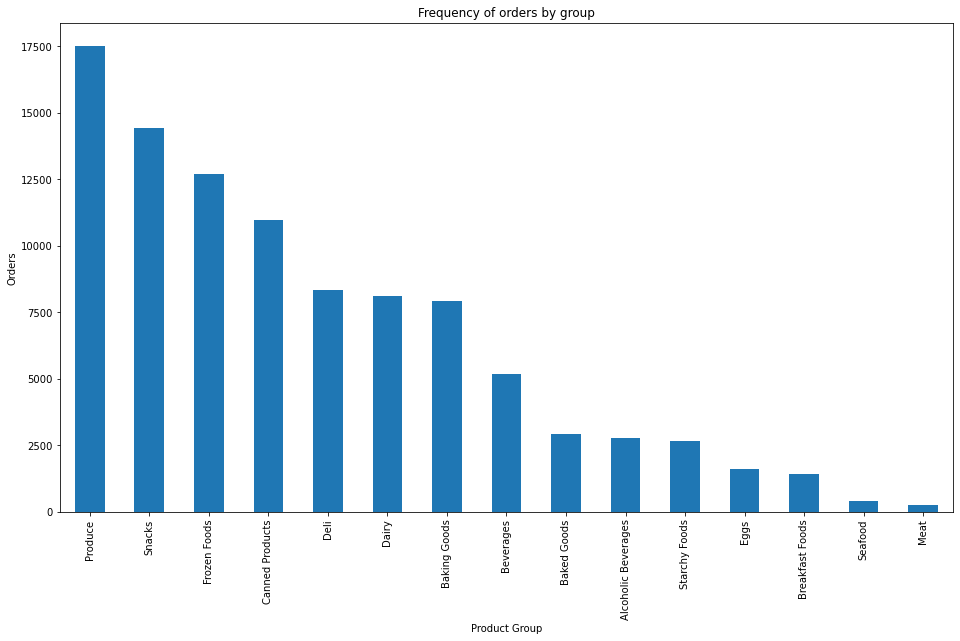

Text(0.5, 1.0, 'Mean profit margin on existing orders by group')

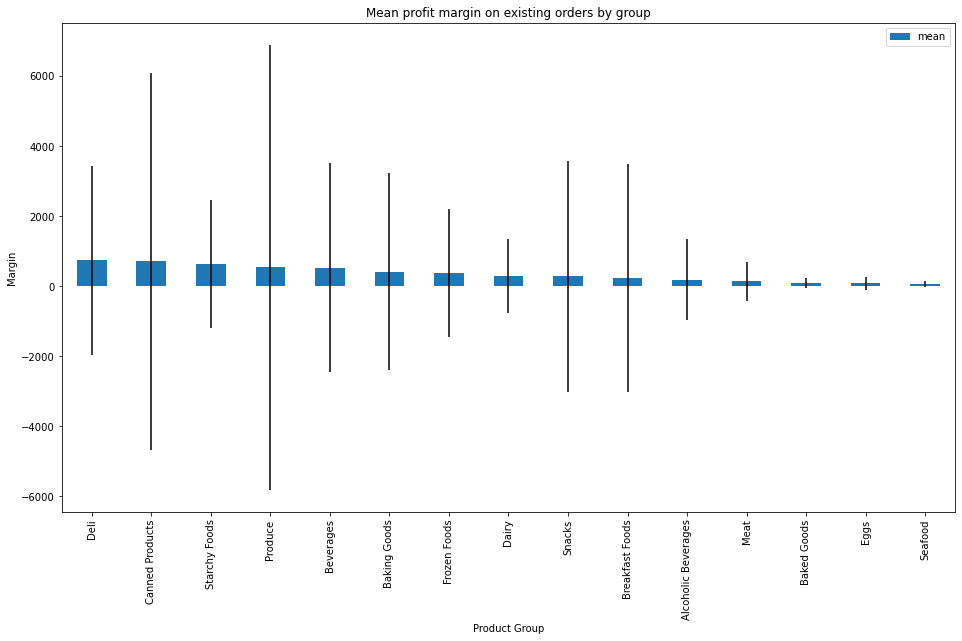

In [40]:
#grocery_merge[grocery_merge["Product Type"].value_counts()].plot()
grocery_merge["Product Group"].value_counts().plot.bar(figsize=(16,9))

#mysterious trouble with plt.~label, have not to my knowledge assigned over it
pyplot.xlabel("Product Group")
pyplot.ylabel("Orders")
pyplot.title('Frequency of orders by group')
pyplot.show()

grocery_merge.groupby("Product Group")["Margin"].agg([np.mean,np.std]).sort_values("mean", ascending = False).plot(kind="bar",yerr="std", figsize=(16,9))
pyplot.xlabel("Product Group")
pyplot.ylabel("Margin")
pyplot.title('Mean profit margin on existing orders by group')
#Huge std dev implies mean margin on groups not particularly useful, too many outliers

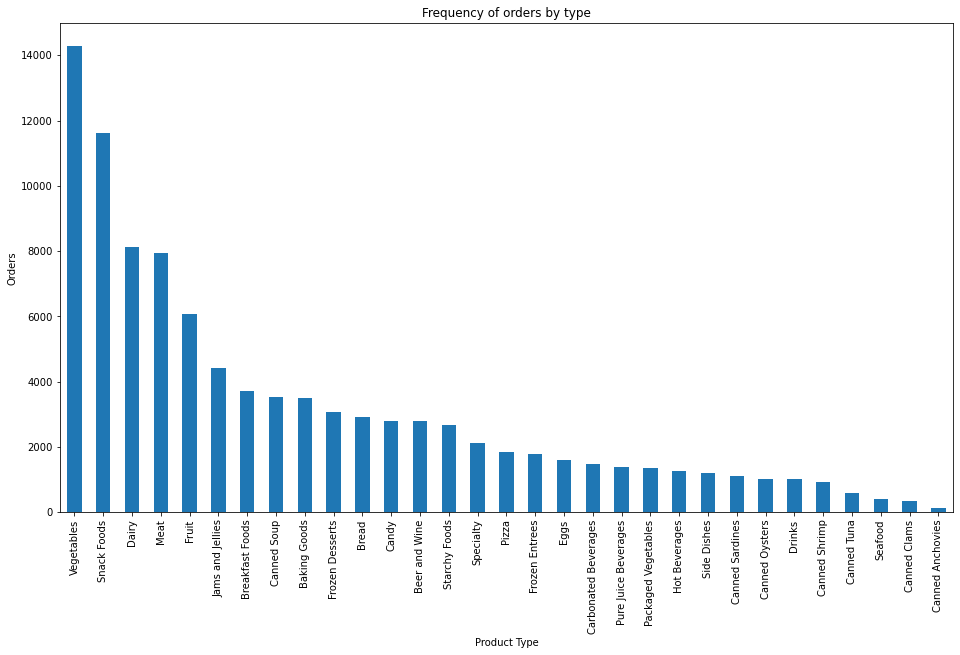

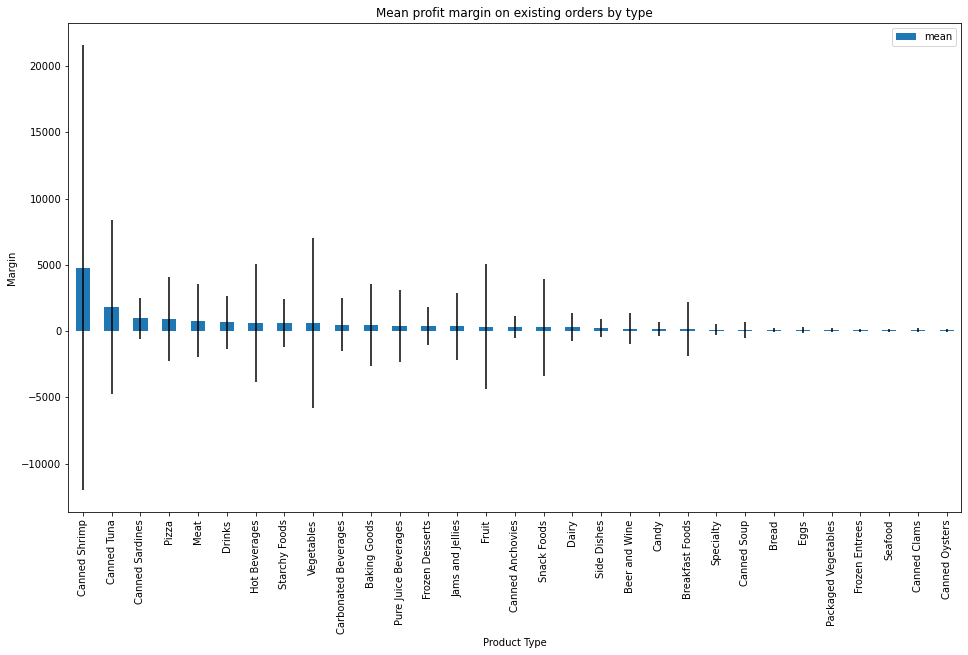

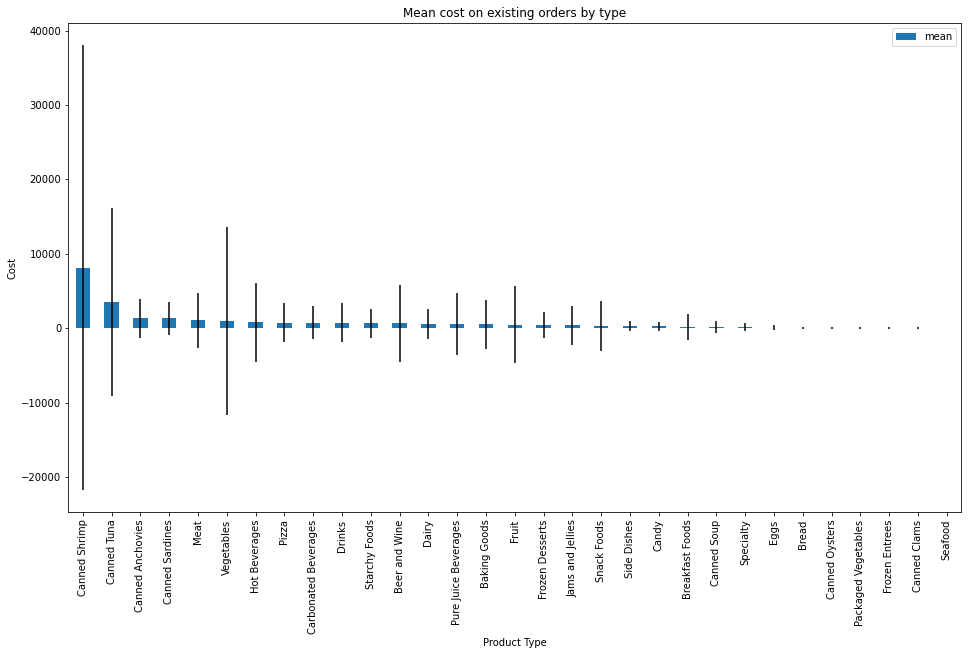

In [124]:
#grocery_merge[grocery_merge["Product Type"].value_counts()].plot()
grocery_merge["Product Type"].value_counts().plot.bar(figsize=(16,9))

#mysterious trouble with plt.~label, have not to my knowledge assigned either
pyplot.xlabel("Product Type")
pyplot.ylabel("Orders")
pyplot.title('Frequency of orders by type')
pyplot.show()

grocery_merge.groupby("Product Type")["Margin"].agg([np.mean,np.std]).sort_values("mean",ascending = False).plot.bar(yerr="std",figsize=(16,9))
pyplot.xlabel("Product Type")
pyplot.ylabel("Margin")
pyplot.title('Mean profit margin on existing orders by type')
pyplot.show()
#finer granularity of product types doesn't give a meaningful reduction in stdev;
#taking stdev as an indication of volatility; error bars show huge potential margin swings
#grocery_merge[(grocery_merge["Margin"]<5000)].groupby("Product Type")["Margin"].agg([np.mean,np.std]).sort_values("mean",ascending = False).plot.bar(yerr="std",figsize=(16,9))
grocery_merge.groupby("Product Type")["Cost"].agg([np.mean,np.std]).sort_values("mean",ascending = False).plot.bar(yerr="std",figsize=(16,9))
pyplot.xlabel("Product Type")
pyplot.ylabel("Cost")
pyplot.title('Mean cost on existing orders by type')
pyplot.show()

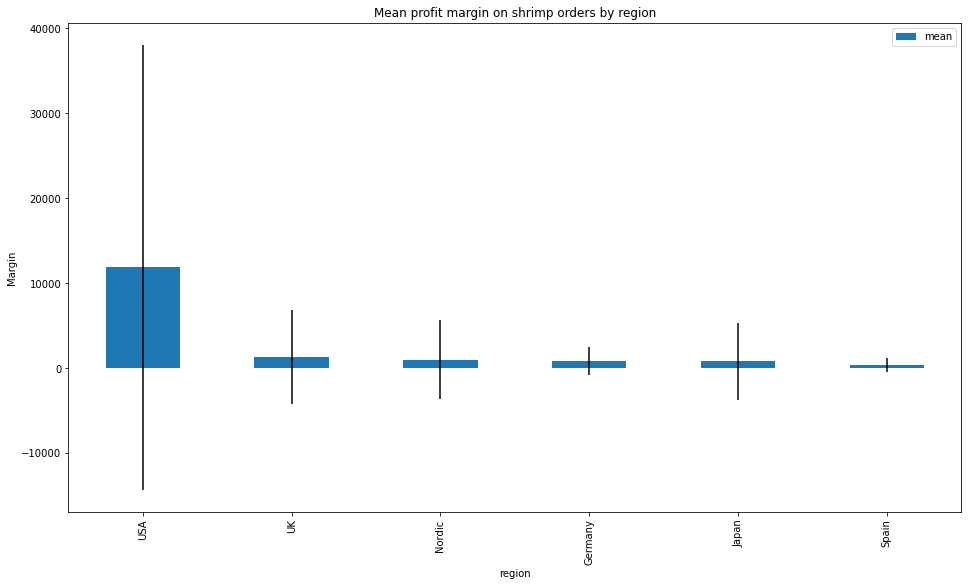

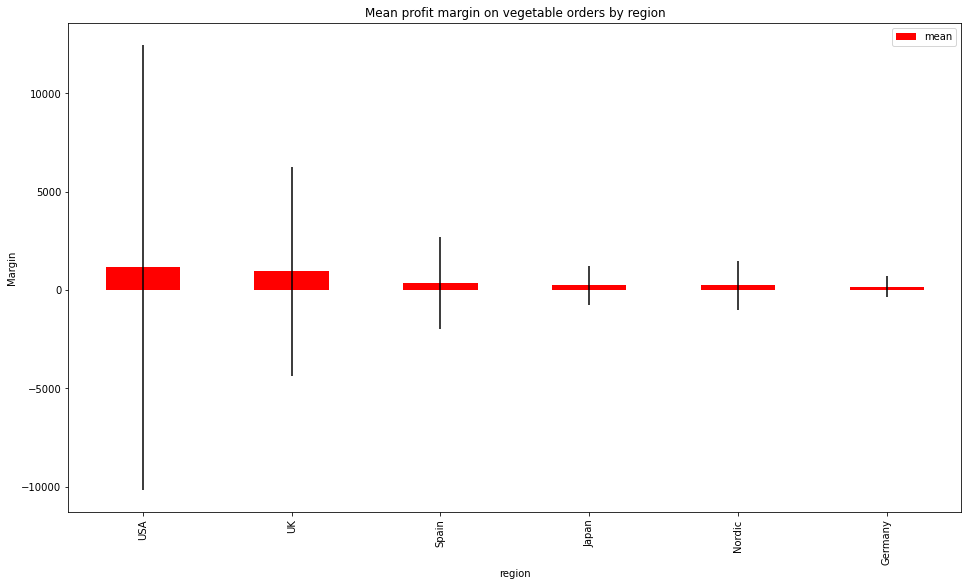

In [260]:



grocery_merge[(grocery_merge["Product Type"]=="Canned Shrimp")].groupby("Region")\
    ["Margin"].agg([np.mean,np.std]).sort_values("mean",ascending = False).\
    plot.bar(yerr="std",figsize=(16,9))
pyplot.xlabel("region")
pyplot.ylabel("Margin")
pyplot.title('Mean profit margin on shrimp orders by region')
#USA makes up huge chunk of the shrimp profits

grocery_merge[(grocery_merge["Product Type"]=="Vegetables")].groupby("Region")["Margin"]\
    .agg([np.mean,np.std]).sort_values("mean",ascending = False).\
plot.bar(yerr="std", color="r",figsize=(16,9))
pyplot.xlabel("region")
pyplot.ylabel("Margin")
pyplot.title('Mean profit margin on vegetable orders by region')
pyplot.show()

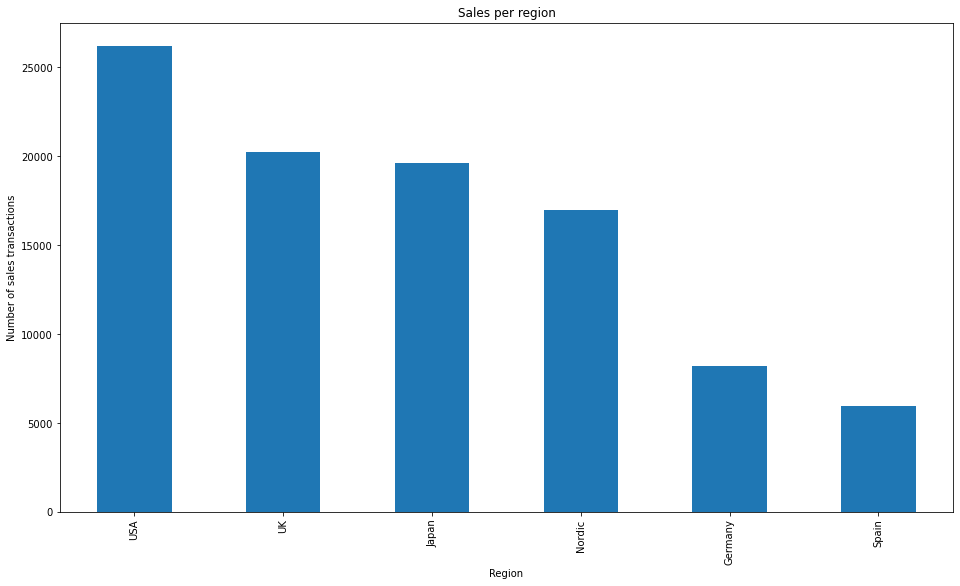

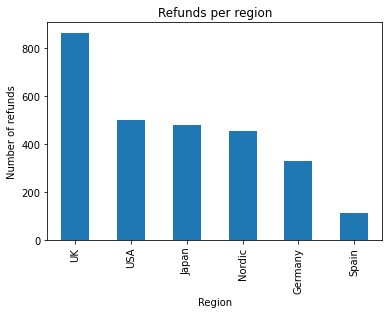

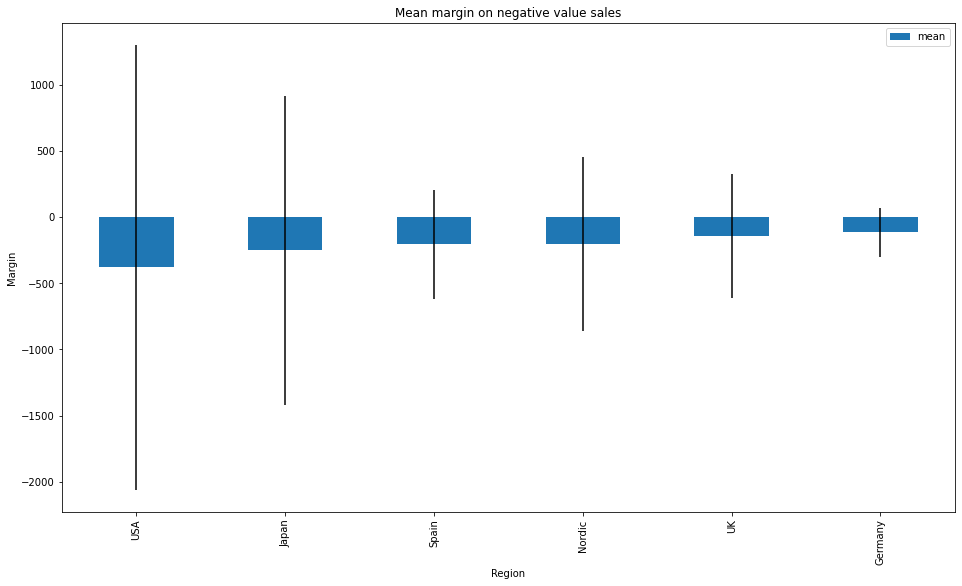

In [274]:
grocery_merge["Region"].value_counts().plot.bar(figsize=(16,9))
pyplot.xlabel("Region")
pyplot.ylabel("Number of sales transactions")
pyplot.title('Sales per region')
pyplot.show()

grocery_merge[(grocery_merge["Sales"]<0)]["Region"].value_counts().plot.bar()
pyplot.xlabel("Region")
pyplot.ylabel("Number of refunds")
pyplot.title('Refunds per region')
pyplot.show()

grocery_merge[(grocery_merge["Sales"]<0)].groupby("Region")["Margin"].agg([np.mean,np.std])\
    .sort_values("mean",ascending = True).plot.bar(yerr="std",figsize=(16,9))
pyplot.xlabel("Region")
pyplot.ylabel("Margin")
pyplot.title('Mean margin on negative value sales')
pyplot.show()
#No strong correlation to state, but one might hypothesize that refunds should be a function of total sales
#the more sales, the higher the likelihood of a refund occurring
#thus, the UK having a higher incidence of refunds despite lower sales is interesting
#if we also take the US as an outlier, with its highest level of total sales
#Japan, the Nordic region and Germany also stand out as having higher refunds
#implies that something is occurring in transit to other countries, i.e. some kind of shipping problem

# grocery_merge[(grocery_merge["Margin"]<0)]["Region"].value_counts()


# grocery_merge[(grocery_merge["Product Type"]=="Canned Shrimp") &(grocery_merge["Margin"]>0)].plot.bar()
#grocery_merge["Product Type"].value_counts().plot.bar(figsize=(16,9))
#grocery_merge.groupby("Region")["Margin"].describe()


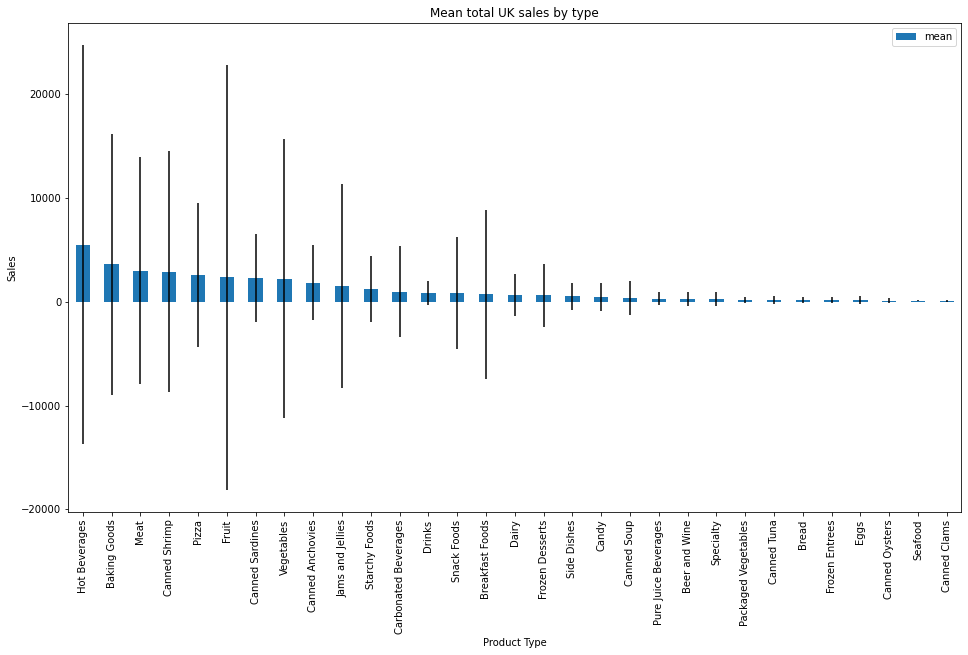

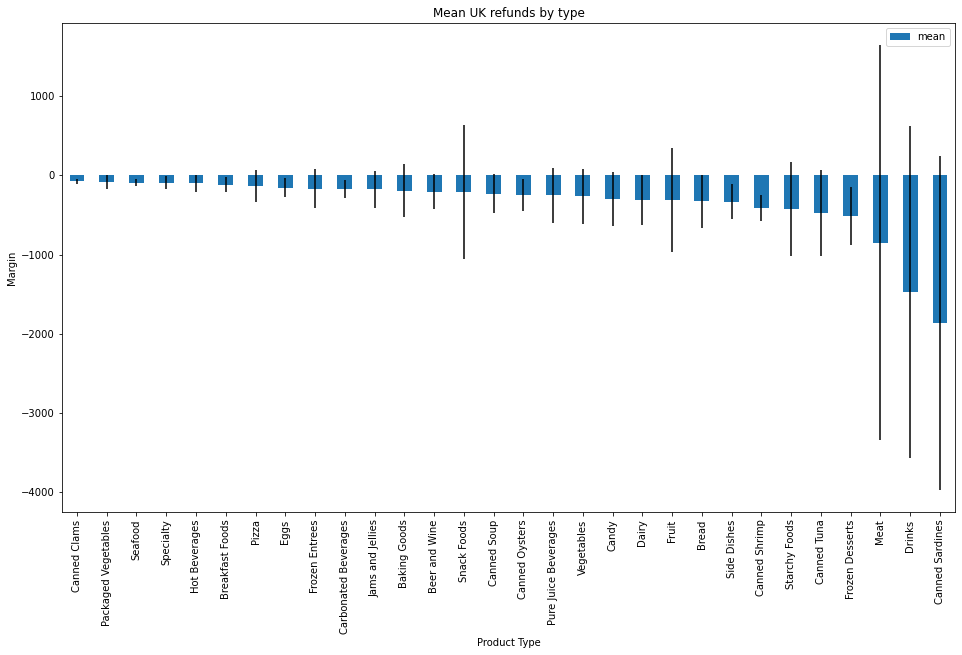

In [172]:
#UK sales
grocery_merge[(grocery_merge["Region"]=="UK")].groupby("Product Type")["Sales"].\
agg([np.mean,np.std]).sort_values("mean",ascending = False).plot.bar(yerr="std",figsize=(16,9))

pyplot.xlabel("Product Type")
pyplot.ylabel("Sales")
pyplot.title('Mean total UK sales by type')
pyplot.show()

grocery_merge[(grocery_merge["Region"]=="UK") &(grocery_merge["Sales"]<0)].groupby("Product Type")["Sales"]\
.agg([np.mean,np.std]).sort_values("mean",ascending = False).plot.bar(yerr="std",figsize=(16,9))

pyplot.xlabel("Product Type")
pyplot.ylabel("Margin")
pyplot.title('Mean UK refunds by type')
pyplot.show()
#looking at the refunds, makes you wonder what is happening to the sardines and drinks. also, meat?




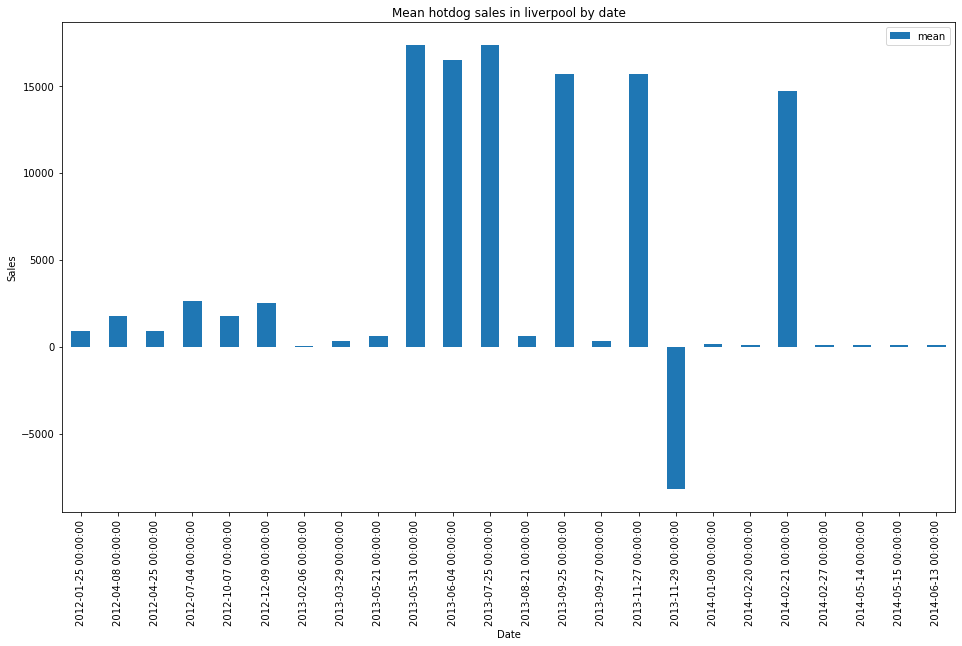

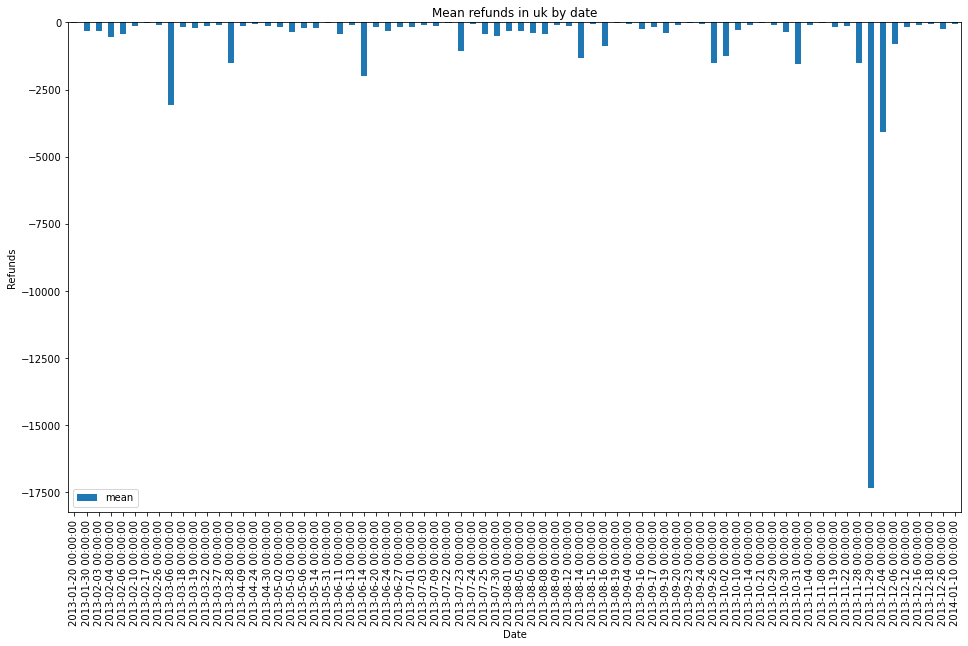

<AxesSubplot:xlabel='Date'>

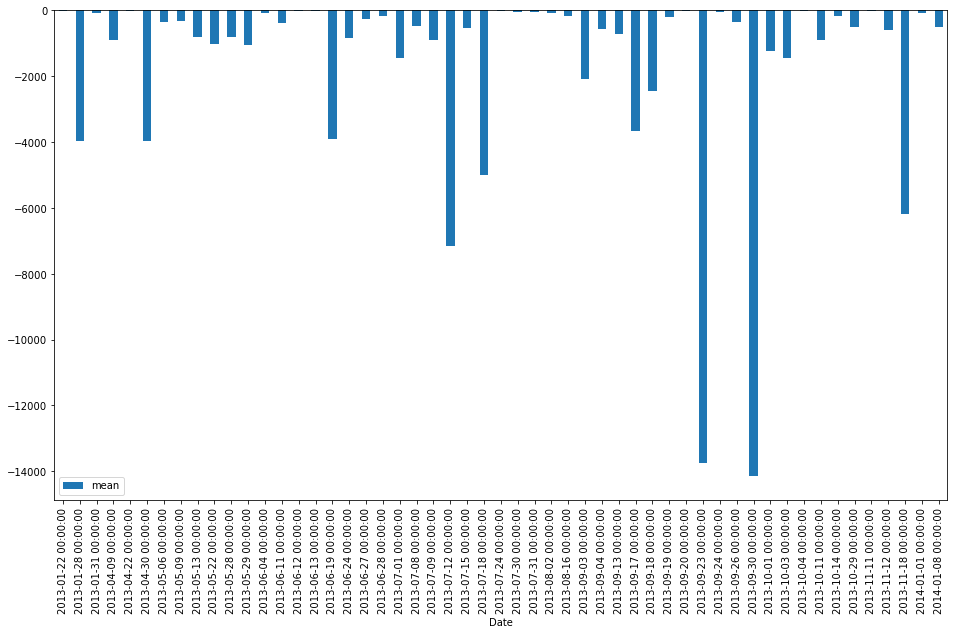

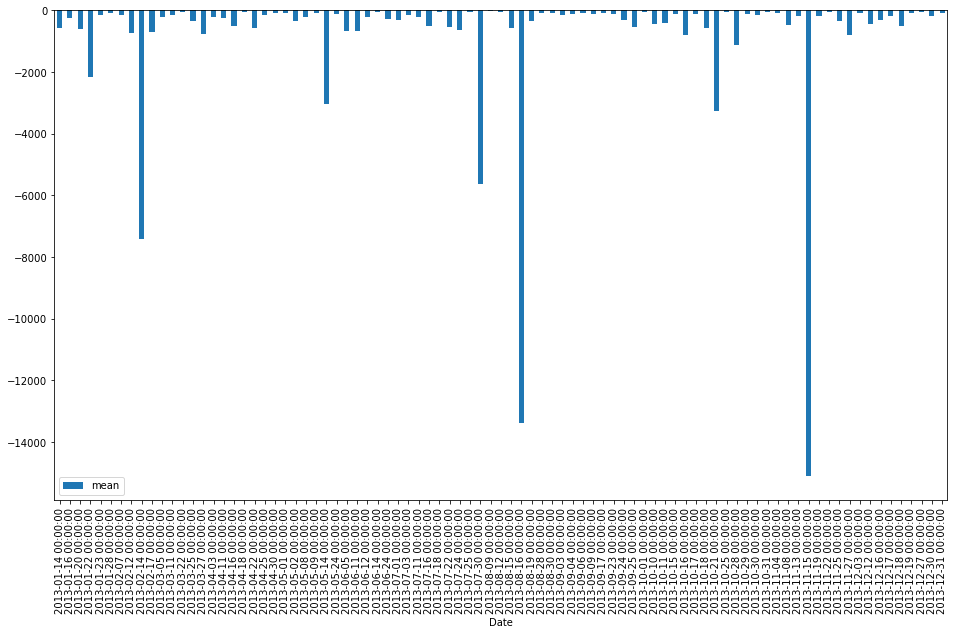

In [216]:
#investigating meat mysteries
#grocery_merge[(grocery_merge["Region"]=="UK") &(grocery_merge["Sales"]<0) &(grocery_merge["Product Type"]=="Meat")].groupby("Product Sub Group")["Sales"].agg([np.mean,np.std]).sort_values("mean",ascending = False).plot.bar(yerr="std",figsize=(16,9))

# grocery_merge[(grocery_merge["Region"]=="UK") &(grocery_merge["Sales"]<0) \
#               &(grocery_merge["Product Sub Group"]=="Hot Dogs")]["Item Desc"].groupby("Item Desc")["Sales"]\
# .agg("mean").plot.bar()

# grocery_merge[(grocery_merge["Region"]=="UK") \
#               &(grocery_merge["Sales"]<0) \
#               &(grocery_merge["Product Sub Group"]=="Hot Dogs")].groupby("Item Desc")["Sales"]\
# .agg([np.mean,np.std]).sort_values("mean",ascending = False).plot.bar(yerr="std",figsize=(16,9))

# grocery_merge[(grocery_merge["Region"]=="UK") \
#               &(grocery_merge["Item Desc"]=="Cutting Edge Foot-Long Hot Dogs")].groupby("City")["Sales"].\
# agg([np.mean,np.std]).sort_values("mean",ascending = False).plot.bar(yerr="std",figsize=(16,9))
#

# grocery_merge[(grocery_merge["Region"]=="UK") \
#               &(grocery_merge["Item Desc"]=="Cutting Edge Foot-Long Hot Dogs") \
#              &(grocery_merge["Sales"]<0)].groupby("City")["Margin"].\
# agg([np.mean,np.std]).sort_values("mean",ascending = False).plot.bar(yerr="std",figsize=(16,9))

#The large hotdog refund in liverpool has no obvious date cause. Require more information to be certain;
# but the purchases seem to lean more event based than seasonal; large purchases in the summer of
#2013 not followed by purchases in summer 2014
#as for refund, mysterious at this stage
grocery_merge[(grocery_merge["City"]=="Liverpool") \
              &(grocery_merge["Product Sub Group"]=="Hot Dogs")].groupby("Date")["Sales"]\
.agg([np.mean]).sort_values("Date",ascending = True).plot.bar(figsize=(16,9))

pyplot.xlabel("Date")
pyplot.ylabel("Sales")
pyplot.title('Mean hotdog sales in liverpool by date')
pyplot.show()

grocery_merge[(grocery_merge["Region"]=="UK") \
              &(grocery_merge["Sales"]<0)
             &(grocery_merge["Date"]>"2013-01-12")
             &(grocery_merge["Date"]<"2014-01-12")].groupby("Date")["Sales"]\
.agg([np.mean]).sort_values("Date",ascending = True).plot.bar(figsize=(16,9))

pyplot.xlabel("Date")
pyplot.ylabel("Refunds")
pyplot.title('Mean refunds in uk by date')
pyplot.show()
#large refund spike in uk doesnt seem to have an obvious correlation with data in this set

grocery_merge[(grocery_merge["Region"]=="USA") \
              &(grocery_merge["Sales"]<0)
             &(grocery_merge["Date"]>"2013-01-12")
             &(grocery_merge["Date"]<"2014-01-12")].groupby("Date")["Sales"]\
.agg([np.mean]).sort_values("Date",ascending = True).plot.bar(figsize=(16,9))
pyplot.xlabel("Date")
pyplot.ylabel("Refunds")
pyplot.title('Mean refunds in USA by date in 2013')
pyplot.show()

grocery_merge[(grocery_merge["Region"]=="Japan") \
              &(grocery_merge["Sales"]<0)
             &(grocery_merge["Date"]>"2013-01-12")
             &(grocery_merge["Date"]<"2014-01-12")].groupby("Date")["Sales"]\
.agg([np.mean]).sort_values("Date",ascending = True).plot.bar(figsize=(16,9))
pyplot.xlabel("Date")
pyplot.ylabel("Refunds")
pyplot.title('Mean refunds in Japan by date in 2013)')
pyplot.show()

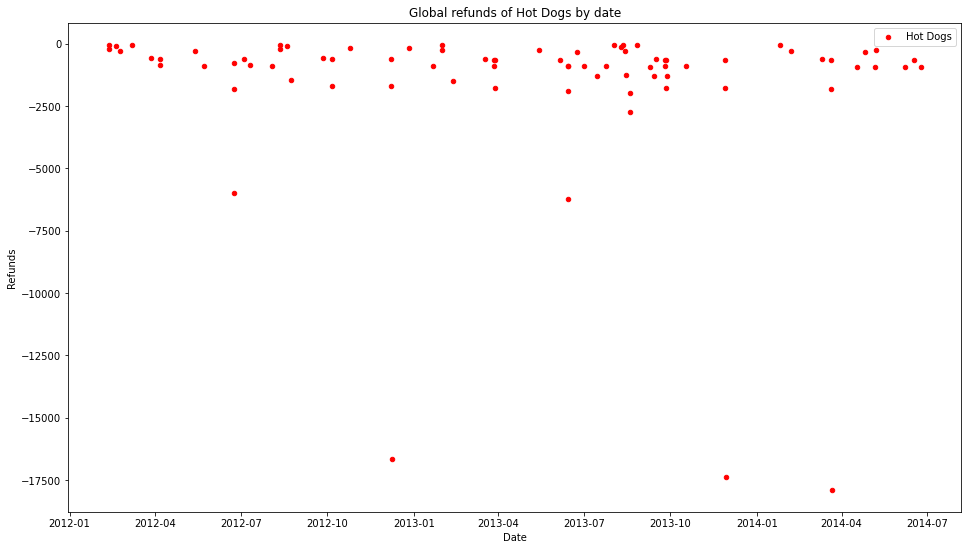

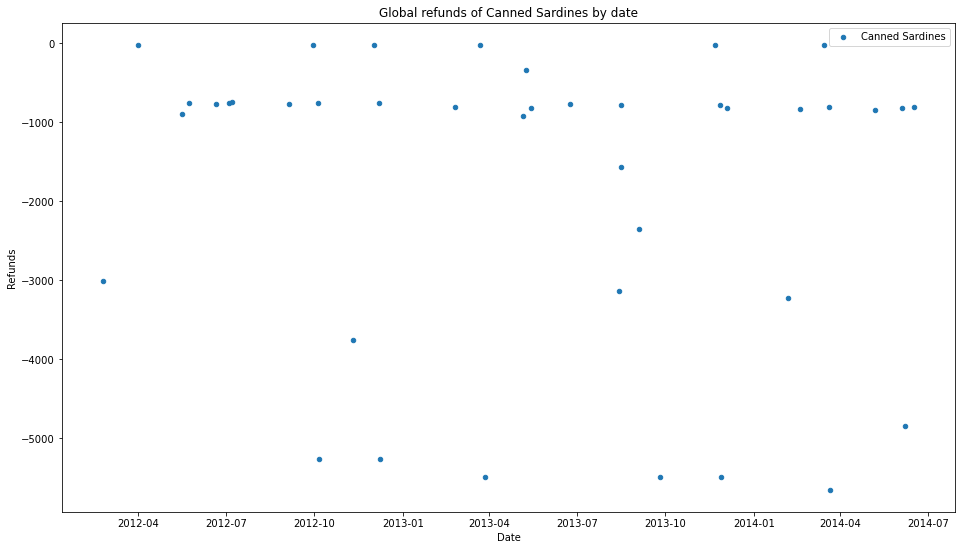

In [246]:
ax1 = grocery_merge[(grocery_merge["Product Sub Group"]=="Hot Dogs") \
                    &(grocery_merge["Sales"]<0)].plot.scatter\
                    (x="Date",y="Sales",figsize=(16,9),color='r',label="Hot Dogs")

#four data points is practically a bare minimum for a pattern, but these datapoints represent
#significant refunds, happening at roughly the same levels at the same time of year twice in a row.
#well worth looking into

pyplot.xlabel("Date")
pyplot.ylabel("Refunds")
pyplot.title('Global refunds of Hot Dogs by date')

# ax2 = grocery_merge[(grocery_merge["Product Type"]=="Canned Sardines") \
#                     &(grocery_merge["Sales"]<0)].plot.scatter(x="Date",y="Sales",label="Canned Sardines",marker="v", ax=ax1,figsize=(16,9))
grocery_merge[(grocery_merge["Product Type"]=="Canned Sardines") \
                    &(grocery_merge["Sales"]<0)].plot.scatter(x="Date",y="Sales",label="Canned Sardines",figsize=(16,9))

pyplot.xlabel("Date")
pyplot.ylabel("Refunds")
pyplot.title('Global refunds of Canned Sardines by date')
pyplot.show()
# print(ax1 == ax2)

#difficult to see on the combined graph, but some of the larger refund instances are shared
#period before 2013-01, 2014-01, 2014-04

<AxesSubplot:xlabel='Product Group'>

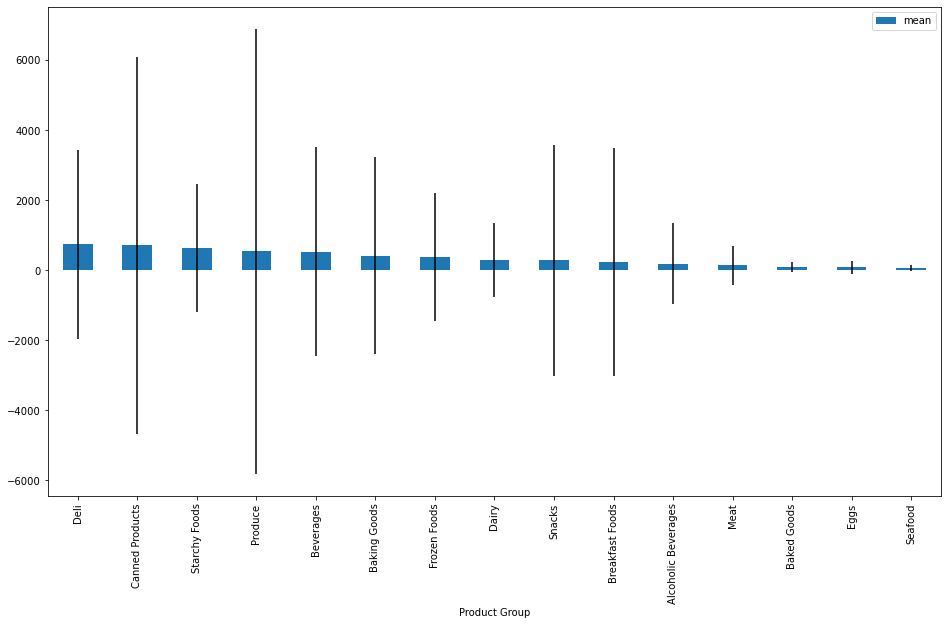

In [38]:
#on average, no items pulling a negative overall margin
#top 3 in margins are canned seafood, lowest 2 canned seafood, lowest 3 seafood in general
#canned seafood on lower end of total orders


<function matplotlib.pyplot.show(close=None, block=None)>

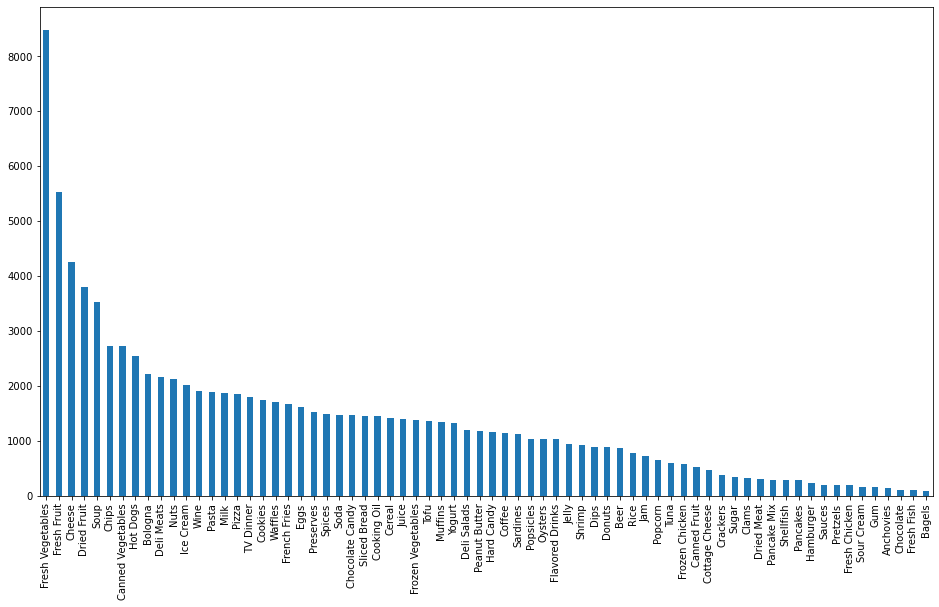

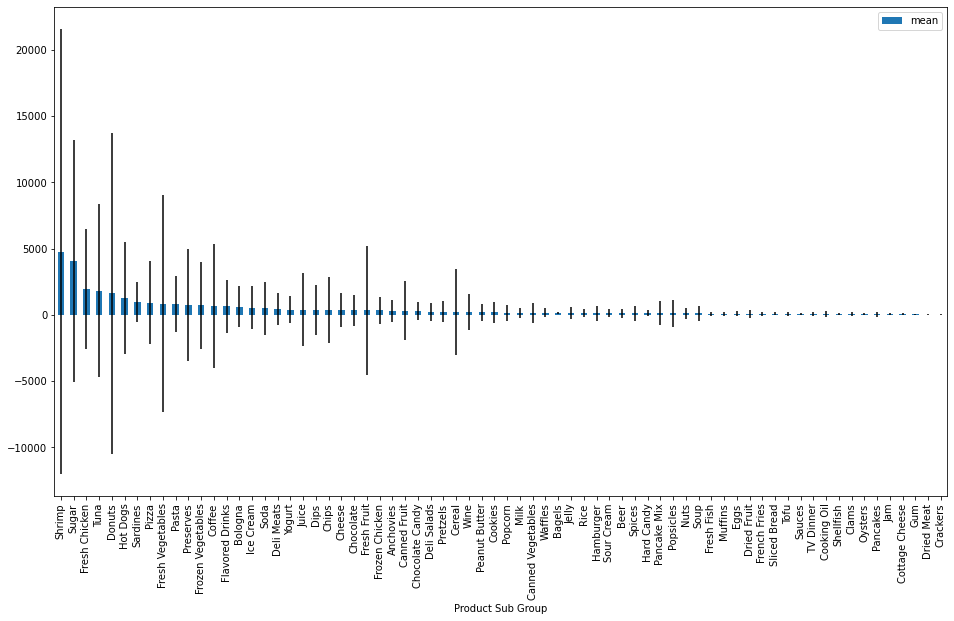

In [249]:
grocery_merge["Product Sub Group"].value_counts().plot.bar(figsize=(16,9))
pyplot.show
grocery_merge.groupby("Product Sub Group")["Margin"].agg([np.mean,np.std]).\
    sort_values("mean",ascending = False).plot.bar(yerr="std",figsize=(16,9))
pyplot.show
#Through sub-groups we get more information on some of the trends
#shrimp still highest, but tuna and sardines move down; other meat items lowering the average
#on chickens and hotdogs

<AxesSubplot:xlabel='Manager'>

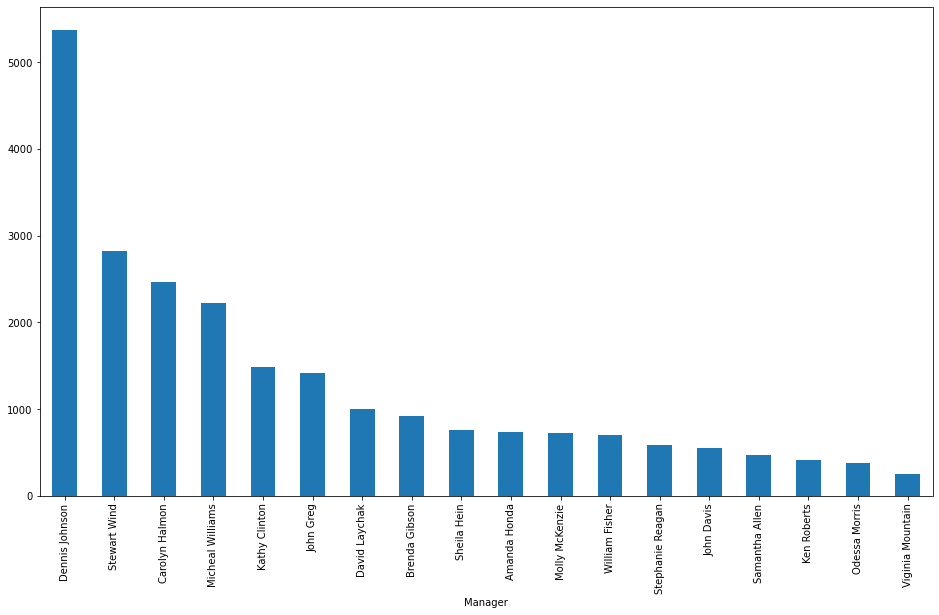

In [39]:
grocery_merge.groupby("Manager")["GrossSales"].agg('mean').sort_values(ascending = False).plot.bar(figsize=(16,9))


<AxesSubplot:xlabel='Manager'>

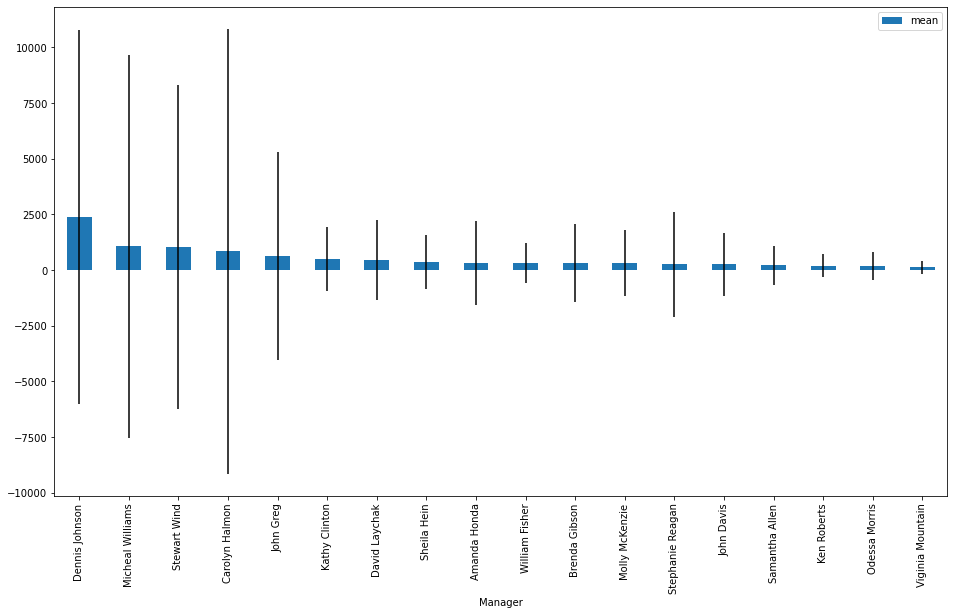

In [250]:
grocery_merge.groupby("Manager")["Margin"].agg([np.mean,np.std]).sort_values\
    ('mean',ascending = False).plot.bar(yerr="std",figsize=(16,9))
#0

In [41]:
grocery_merge["Manager"].value_counts()
#Dennis Johnson managing the most gross sales and highest margin, more than twice the profit of
#second, nearly twice the gross sales of 2nd, 5th lowest total unique orders

Samantha Allen      16182
Amanda Honda         8865
John Davis           7496
Molly McKenzie       7058
John Greg            6954
Brenda Gibson        6860
Odessa Morris        6137
Stephanie Reagan     6013
Stewart Wind         5517
Carolyn Halmon       4660
Ken Roberts          4191
David Laychak        3895
Kathy Clinton        3490
Dennis Johnson       2999
Sheila Hein          2341
Viginia Mountain     2078
Micheal Williams     1805
William Fisher        680
Name: Manager, dtype: int64

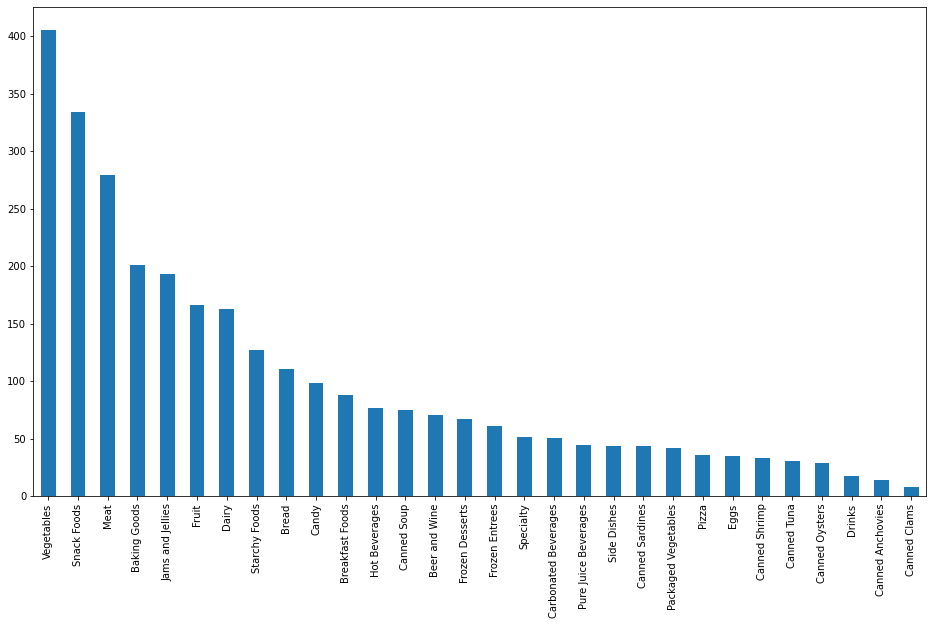

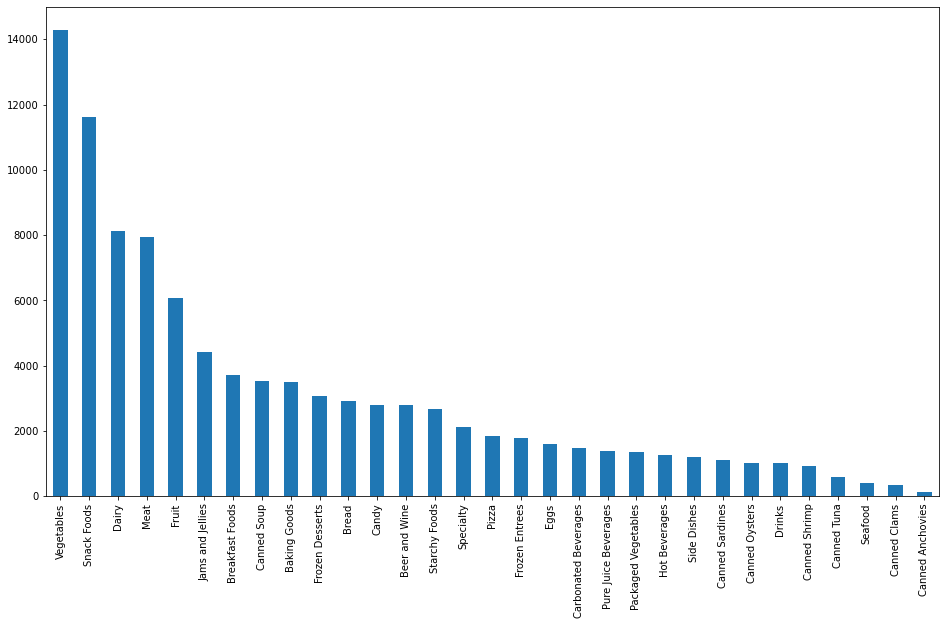

In [82]:
grocery_merge[grocery_merge["Manager"]=="Dennis Johnson"]["Product Type"].value_counts().plot.bar(figsize=(16,9))
pyplot.show()
grocery_merge["Product Type"].value_counts().plot.bar(figsize=(16,9))
pyplot.show()
#for reference, no huge changes to the form

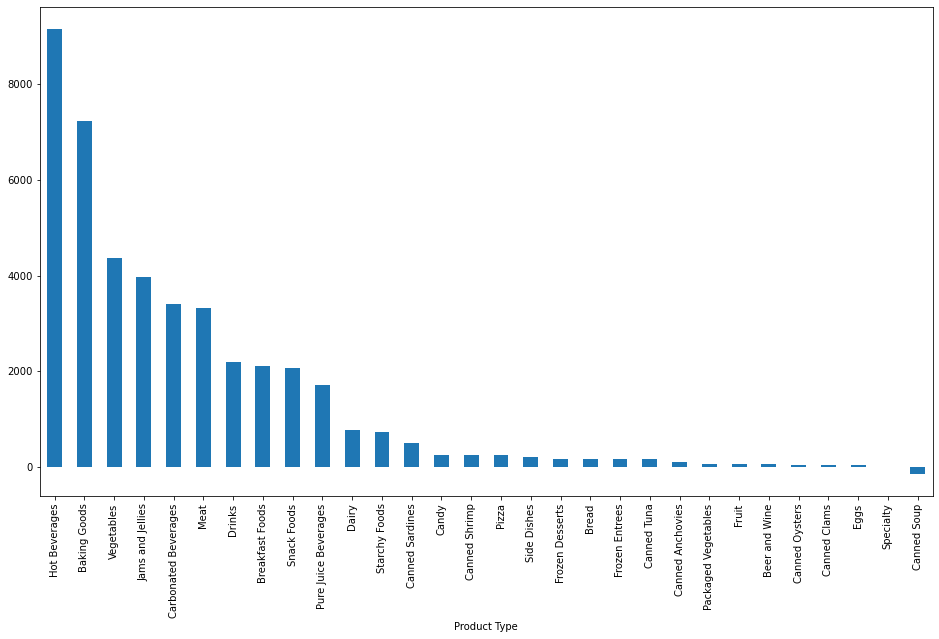

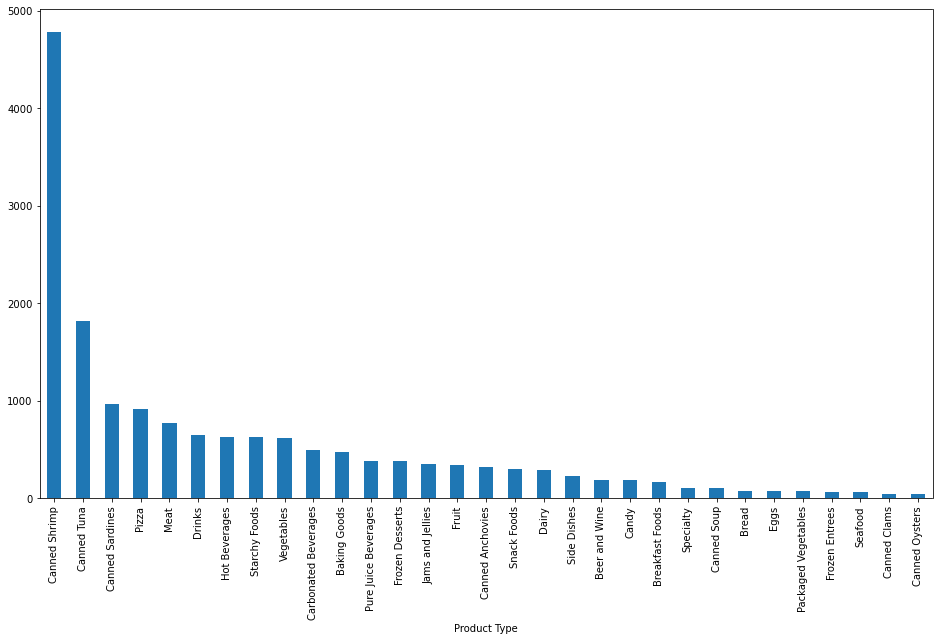

In [62]:
grocery_merge[grocery_merge["Manager"]=="Dennis Johnson"].groupby("Product Type")["Margin"]\
.agg('mean').sort_values(ascending = False).plot.bar(figsize=(16,9))
pyplot.subplots()
grocery_merge.groupby("Product Type")["Margin"].agg('mean').sort_values(ascending = False)\
.plot.bar(figsize=(16,9))
pyplot.show()



<AxesSubplot:xlabel='Product Type'>

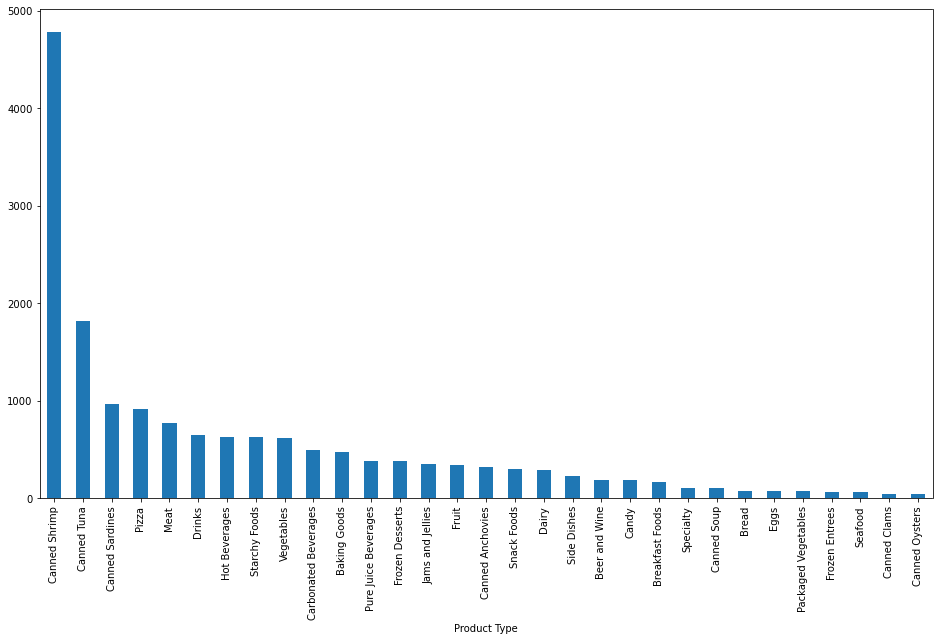

In [57]:
grocery_merge.groupby("Product Type")["Margin"].agg('mean').sort_values(ascending = False).plot.bar(figsize=(16,9))
#comparative again

<AxesSubplot:xlabel='Sales', ylabel='Margin'>

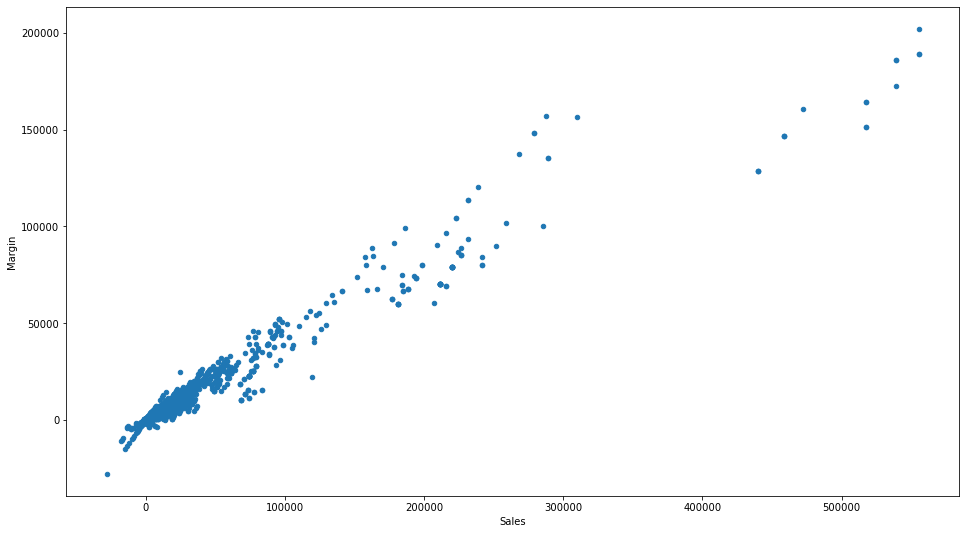

In [80]:
grocery_merge.plot(kind='scatter',x='Sales',y="Margin",figsize=(16,9))
#trend seems fairly clear, not particularly useful. Volume of sale increases margins

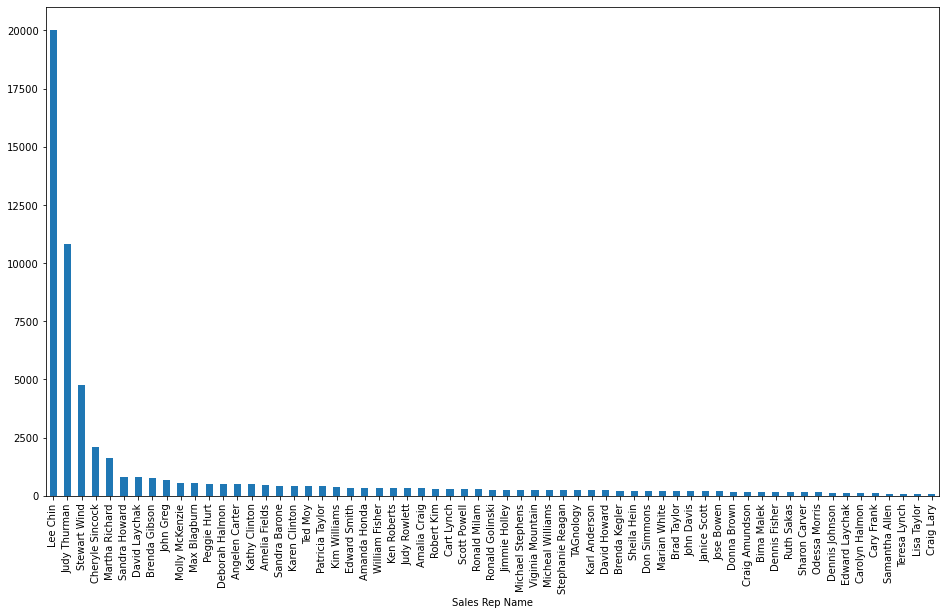

Sales Rep Name
Lee Chin           20024.124771
Judy Thurman       10841.379277
Stewart Wind        4746.694183
Cheryle Sincock     2103.151792
Martha Richard      1608.981410
Name: Margin, dtype: float64

In [93]:

grocery_merge.groupby("Sales Rep Name")["Margin"].agg('mean').sort_values(ascending = False)\
    .plot.bar(figsize=(16,9))
pyplot.show()
#grocery_merge[grocery_merge["Product Type"]=="Canned Shrimp"].groupby("Sales Rep Name")["Margin"].agg('median').sort_values(ascending = False).plot.bar(figsize=(16,9))
pyplot.show()
grocery_merge.groupby("Sales Rep Name")["Margin"].agg('mean').sort_values(ascending = False)\.
    head()


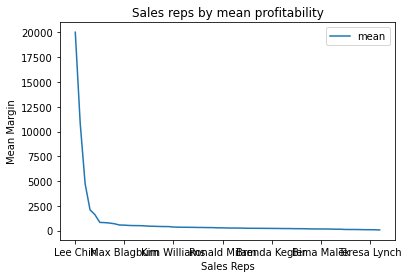

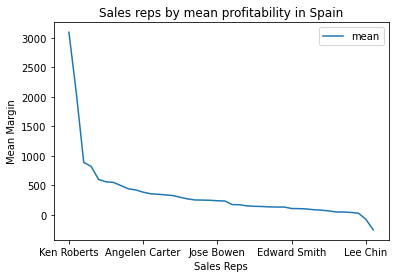

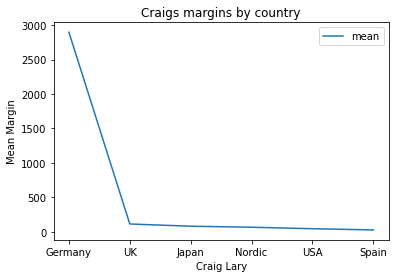

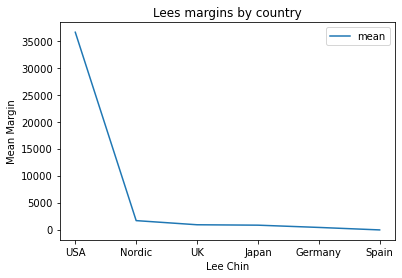

In [292]:
grocery_merge.groupby("Sales Rep Name")["Margin"].agg([np.mean])\
    .sort_values('mean',ascending = False).plot()
pyplot.xlabel("Sales Reps")
pyplot.ylabel("Mean Margin")
pyplot.title('Sales reps by mean profitability')

grocery_merge[grocery_merge['Region']=='Spain'].groupby("Sales Rep Name")["Margin"].agg([np.mean])\
    .sort_values('mean',ascending = False).plot()
pyplot.xlabel("Sales Reps")
pyplot.ylabel("Mean Margin")
pyplot.title('Sales reps by mean profitability in Spain')
grocery_merge[(grocery_merge['Sales Rep Name']=='Craig Lary')|(grocery_merge['Sales Rep Name2']=='Craig Lary')].groupby("Region")["Margin"].agg([np.mean])\
    .sort_values('mean',ascending = False).plot()
pyplot.xlabel("Craig Lary")
pyplot.ylabel("Mean Margin")
pyplot.title('Craigs margins by country')

grocery_merge[(grocery_merge['Sales Rep Name']=='Lee Chin')|(grocery_merge['Sales Rep Name2']=='Lee Chin')].groupby("Region")["Margin"].agg([np.mean])\
    .sort_values('mean',ascending = False).plot()
pyplot.xlabel("Lee Chin")
pyplot.ylabel("Mean Margin")
pyplot.title('Lees margins by country')
pyplot.show()